<a href="https://colab.research.google.com/github/tenoob/Sementic-Segmentation/blob/dev/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
!pip install patchify

In [98]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from patchify import patchify
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
from google.colab.patches import cv2_imshow

In [99]:
root_dir = '/content/drive/MyDrive/Colab Notebooks/dataset/Semantic segmentation dataset'

In [100]:
patch_size = 256
scaler = MinMaxScaler()
image_dset = []
mask_dset = []

In [ ]:
for path, sub_dir,files in

In [101]:
#preprocess on images
for path , sub_dirs, files in os.walk(root_dir):
    #print(path)
    dir_name = path.split(os.path.sep)[-1]
    #print(dir_name)
    if dir_name ==  'images':
        images = os.listdir(path)
        #print(images)
        for index,image_name in enumerate(images):
            print(index,image_name)
            if image_name.endswith(".jpg"):
                image = cv2.imread(path+"/"+image_name,1)
                print(path+"/"+image_name)
                image_width = (image.shape[1]//patch_size)*patch_size
                image_height = (image.shape[0]//patch_size)*patch_size
                image = Image.fromarray(image) #convert img from ndarray to pil.image
                image = image.crop((0,0,image_width,image_height))
                image = np.array(image)  #convert the img back to nparray
                patch_img = patchify(image,(patch_size,patch_size,3),step = patch_size)
                #print(type(patch_img),patch_img.shape)
                for i in range(patch_img.shape[0]):
                    for j in range(patch_img.shape[1]):
                        small_pathes = patch_img[i,j,:,:]
                        #print(small_pathes.shape)
                        small_pathes = scaler.fit_transform(small_pathes.reshape(-1,small_pathes.shape[-1])).reshape(small_pathes.shape)
                        small_pathes = small_pathes[0]  #remove unwanted patchify dimensions
                        #print(small_pathes.shape)
                        image_dset.append(small_pathes)

0 image_part_007.jpg
/content/drive/MyDrive/Colab Notebooks/dataset/Semantic segmentation dataset/Tile 2/images/image_part_007.jpg
1 image_part_001.jpg
/content/drive/MyDrive/Colab Notebooks/dataset/Semantic segmentation dataset/Tile 2/images/image_part_001.jpg
2 image_part_004.jpg
/content/drive/MyDrive/Colab Notebooks/dataset/Semantic segmentation dataset/Tile 2/images/image_part_004.jpg
3 image_part_008.jpg
/content/drive/MyDrive/Colab Notebooks/dataset/Semantic segmentation dataset/Tile 2/images/image_part_008.jpg
4 image_part_002.jpg
/content/drive/MyDrive/Colab Notebooks/dataset/Semantic segmentation dataset/Tile 2/images/image_part_002.jpg
5 image_part_005.jpg
/content/drive/MyDrive/Colab Notebooks/dataset/Semantic segmentation dataset/Tile 2/images/image_part_005.jpg
6 image_part_003.jpg
/content/drive/MyDrive/Colab Notebooks/dataset/Semantic segmentation dataset/Tile 2/images/image_part_003.jpg
7 image_part_009.jpg
/content/drive/MyDrive/Colab Notebooks/dataset/Semantic segmen

In [102]:
print(image_dset[0].shape)

(256, 256, 3)


In [103]:
#preprocess on masks
for path , sub_dirs, files in os.walk(root_dir):
    #print(path)
    dir_name = path.split(os.path.sep)[-1]
    #print(dir_name)
    if dir_name ==  'masks':
        images = os.listdir(path)
        #print(images)
        for index,mask_name in enumerate(images):
            print(index,mask_name)
            if mask_name.endswith(".png"):
                mask = cv2.imread(path+"/"+mask_name,1)
                mask = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
                print(path+"/"+mask_name)
                mask_width = (mask.shape[1]//patch_size)*patch_size
                mask_height = (mask.shape[0]//patch_size)*patch_size
                mask = Image.fromarray(mask) #convert mask from ndarray to pil.image
                mask = mask.crop((0,0,mask_width,mask_height))
                mask = np.array(mask)  #convert the mask back to nparray
                patch_mask = patchify(mask,(patch_size,patch_size,3),step = patch_size)
                #print(type(patch_img),patch_img.shape)
                for i in range(patch_mask.shape[0]):
                    for j in range(patch_mask.shape[1]):
                        small_pathes = patch_mask[i,j,:,:]
                        #print(small_pathes.shape)
                        small_pathes = scaler.fit_transform(small_pathes.reshape(-1,small_pathes.shape[-1])).reshape(small_pathes.shape)
                        small_pathes = small_pathes[0]  #remove unwanted patchify dimensions
                        #print(small_pathes.shape)
                        mask_dset.append(small_pathes)

0 image_part_005.png
/content/drive/MyDrive/Colab Notebooks/dataset/Semantic segmentation dataset/Tile 2/masks/image_part_005.png
1 image_part_004.png
/content/drive/MyDrive/Colab Notebooks/dataset/Semantic segmentation dataset/Tile 2/masks/image_part_004.png
2 image_part_007.png
/content/drive/MyDrive/Colab Notebooks/dataset/Semantic segmentation dataset/Tile 2/masks/image_part_007.png
3 image_part_001.png
/content/drive/MyDrive/Colab Notebooks/dataset/Semantic segmentation dataset/Tile 2/masks/image_part_001.png
4 image_part_003.png
/content/drive/MyDrive/Colab Notebooks/dataset/Semantic segmentation dataset/Tile 2/masks/image_part_003.png
5 image_part_009.png
/content/drive/MyDrive/Colab Notebooks/dataset/Semantic segmentation dataset/Tile 2/masks/image_part_009.png
6 image_part_002.png
/content/drive/MyDrive/Colab Notebooks/dataset/Semantic segmentation dataset/Tile 2/masks/image_part_002.png
7 image_part_008.png
/content/drive/MyDrive/Colab Notebooks/dataset/Semantic segmentation 

In [104]:
print(mask_dset[0].shape)
type(mask_dset[0])

(256, 256, 3)


numpy.ndarray

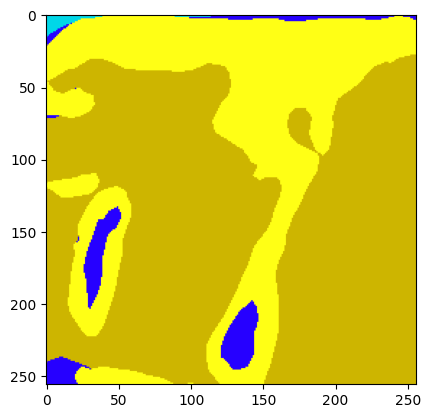

In [105]:
plt.imshow(mask_dset[1])

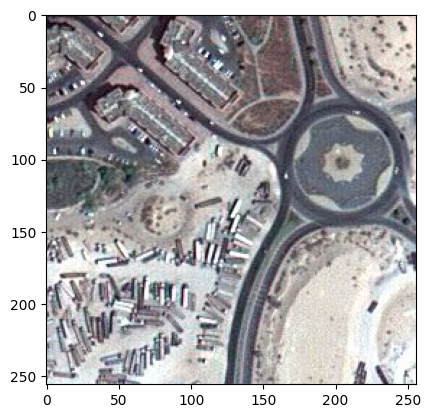

In [106]:
plt.imshow(image_dset[1])